In [59]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [3]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
tf.__version__

'2.0.0'

In [10]:
import pathlib

data_dir = tf.keras.utils.get_file(origin='http://download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 79s 0us/step


In [11]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [12]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'],
      dtype='<U10')

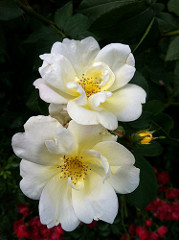

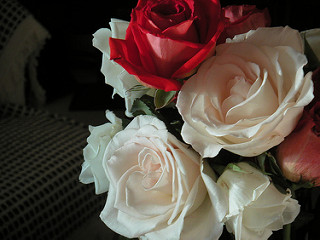

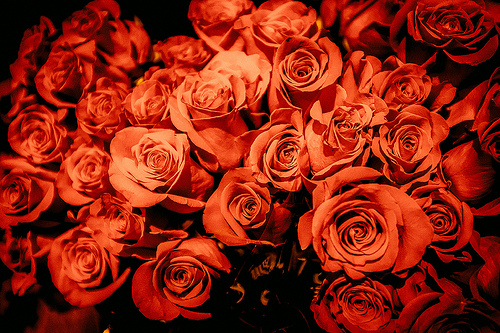

In [18]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
    display.display(Image.open(str(image_path)))

In [104]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, rotation_range=14, zoom_range=0.15,
	shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

In [101]:
BATCH_SIZE = 16
IMG_HEIGHT = 32
IMG_WIDTH = 32
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [110]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
                                                     
test_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.
Found 3670 images belonging to 5 classes.


In [92]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(16):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

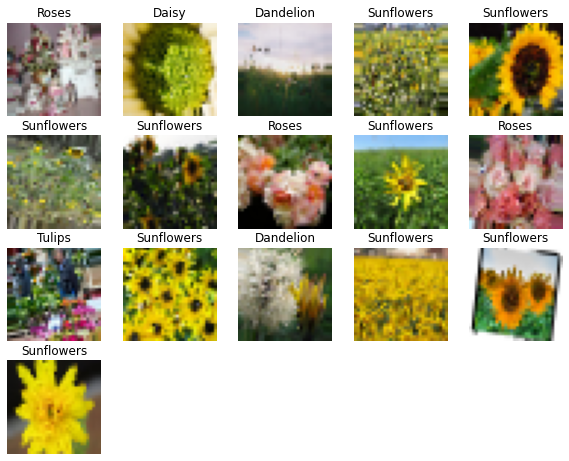

In [108]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [120]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [121]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [122]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))


In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [131]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [132]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=2000//BATCH_SIZE,
    epochs=50,
    validation_data=test_data_gen,
     validation_steps=800 // BATCH_SIZE)

Epoch 1/50
125/125 [==============================] - 8s 61ms/step - loss: 1.1768 - accuracy: 0.7943 - val_loss: 1.1991 - val_accuracy: 0.8000
Epoch 2/50
125/125 [==============================] - 8s 64ms/step - loss: 1.0888 - accuracy: 0.7957 - val_loss: 1.1943 - val_accuracy: 0.7982
Epoch 3/50
125/125 [==============================] - 8s 61ms/step - loss: 0.5629 - accuracy: 0.7943 - val_loss: 0.4348 - val_accuracy: 0.8107
Epoch 4/50
125/125 [==============================] - 8s 65ms/step - loss: 0.4463 - accuracy: 0.8018 - val_loss: 0.4374 - val_accuracy: 0.8070
Epoch 5/50
125/125 [==============================] - 7s 59ms/step - loss: 0.4385 - accuracy: 0.8086 - val_loss: 0.4598 - val_accuracy: 0.8040
Epoch 6/50
125/125 [==============================] - 7s 60ms/step - loss: 0.4535 - accuracy: 0.8060 - val_loss: 0.4439 - val_accuracy: 0.8070
Epoch 7/50
125/125 [==============================] - 8s 60ms/step - loss: 0.4863 - accuracy: 0.7963 - val_loss: 0.4802 - val_accuracy: 0.7982

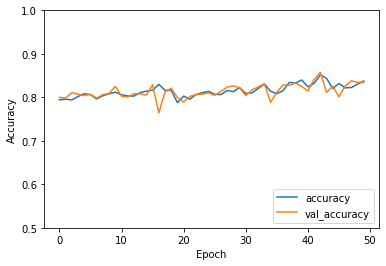

In [136]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate_generator(test_data_gen)

In [137]:
test_acc

0.84272456